In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_absolute_percentage_error as MAPE
import matplotlib.pyplot as plt
import pydotplus
import pickle
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
import os
from IPython.display import clear_output
import matplotlib.style as style
from tensorflow import random
from numpy.random import seed
seed(5)
random.set_seed(5)
style.use('ggplot')

In [3]:
df = pd.read_excel('../final_data.xlsx')

df=df.iloc[:,1:]
df_org = df.copy()
df.head(3)

,Duration,Resource Cost,Fixed Cost,Cost/Hour,Variable Cost,Total Cost,Actual Cost
0,3.0,2400.0,0.0,0.0,0.0,2400.0,2400.0
1,1.0,800.0,0.0,0.0,0.0,800.0,800.0
2,1.0,440.0,0.0,0.0,0.0,440.0,440.0


In [52]:
#Standardization or Normalization
cols =['Duration', 'Resource Cost', 'Fixed Cost', 'Cost/Hour', 'Variable Cost','Total Cost']
for column in cols:
    df[column] = StandardScaler().fit_transform(np.array(df[column]).reshape(-1,1))
y_standardization = StandardScaler()
df['Actual Cost'] = y_standardization.fit_transform(np.array(df['Actual Cost']).reshape(-1,1))
df.head(5)

,Duration,Resource Cost,Fixed Cost,Cost/Hour,Variable Cost,Total Cost,Actual Cost
0,-0.517100,2.084440,-0.285569,-0.350953,-0.25313,-0.338709,-0.340865
1,-0.672810,0.489769,-0.285569,-0.350953,-0.25313,-0.364778,-0.365680
2,-0.672810,0.130968,-0.285569,-0.350953,-0.25313,-0.370643,-0.371264
3,-0.740932,-0.307566,-0.285551,-0.350953,-0.25313,-0.377796,-0.378073
4,-0.711737,0.059208,-0.111735,-0.350953,-0.25313,-0.216745,-0.224765


In [133]:
y_standardization.inverse_transform(df['Actual Cost'])

In [122]:
df.columns
['Duration', 'Resource Cost', 'Fixed Cost', 'Cost/Hour', 'Variable Cost','Total Cost', 'Actual Cost']

In [4]:
# setting x and y
#['Duration', 'Resource Cost', 'Fixed Cost', 'Cost/Hour', 'Variable Cost','Total Cost', 'Actual Cost']

X = df.drop(['Actual Cost'],axis=1)
# X = df[['Duration','Total Cost']]
y = df['Actual Cost']
# preparing test and train
X_train,X_val,y_train,y_val = train_test_split(
    X,y,test_size=0.2,random_state=41
)

In [5]:
def plot_metrics(epochs,loss,mse,val_loss,val_mse,title):
    x = range(1,epochs+1)
    fig = plt.figure()
    plt.title('ANN Optimization')
    plt.plot(x,loss,c='green',label='train')
    plt.plot(x,val_loss,c='red',label='validation')
    plt.legend()
    plt.savefig('pics_mape/'+title+'-mape.png')
    plt.show()

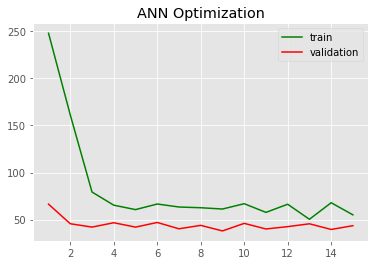

Validation MAE:
43.599117279052734
TEST MAE
5855.932617634554
MAPE:
0.4359911184609065


In [26]:
# lrs=np.linspace(0.0002,0.0005,20)
lr = 0.001
# counter = 1
epochs = 15
# maes_test = []
# maes_val = []
# for lr in lrs:
# print("*****"+str(counter)+'*****')
# counter+=1
model = Sequential()
model.add(Dense(6, input_dim=6,  activation='linear'))
model.add(Dense(6,activation='linear'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_absolute_percentage_error', optimizer=Adam(lr=lr),metrics=['mse'])
history = model.fit(X_train,y_train,epochs=epochs,validation_data=(X_val,y_val))
ml = history.history
clear_output(wait=True)
plot_metrics(epochs,ml['loss'],ml['mse'],ml['val_loss'],ml['val_mse'],title='1-hidden-layers-100دثعقخدس')
y_pred=model.predict(X_val)
# y_pred = y_standardization.inverse_transform(y_pred)
# y_val = y_standardization.inverse_transform(y_val)
# maes_test.append(MAE(y_test,y_pred))
# maes_val.append(ml['val_loss'][-1])
print("Validation MAE:")
print(ml['val_loss'][-1])
print("TEST MAE")
print(MAE(y_val,y_pred))
print("MAPE:")
print(MAPE(y_val,y_pred))
# fig = plt.figure()
# plt.plot(lrs,maes_val,c='green',label='mae_val')
# plt.plot(lrs,maes_test,c='red',label='mae_test')
# plt.legend()
# plt.show()

In [79]:
print(lrs[maes_test.index(min(maes_test))])

### Base Model (with no hyper parameters)
epochs = 5
hidden_layers = 1
Neurons = 6,6
Activation = 'linear'
MAE Val = 3120.5185546875
MAE test = 3410.709625346423
#### with two attrs
#### with all attrs

# TESTING

In [16]:
mae = []
mape = []
mse = []
counter = 1
lr = 0.001
# beta_1_list = np.linspace(0,1,10,endpoint=False)
# beta_2_list = np.linspace(0,1,10,endpoint=False)
# epsilon_list = np.linspace(0,1,5,endpoint=False)
# lrs = np.linspace(0.0009,0.001,100)
# for epsilon in epsilon_list:
# print('****'+str(counter)+'****');counter+=1
for i in range(20):
    print('****'+str(counter)+'****');counter+=1
    X = df.drop(['Actual Cost'],axis=1)
    y = df['Actual Cost']
    X_train,X_test,y_train,y_test = train_test_split(
        X,y,test_size=0.2) #random_state=41
    model = Sequential()
    model.add(Dense(6, input_dim=6, activation='linear'))
    model.add(Dense(6,activation='linear'))
    model.add(Dense(1,activation='linear'))
    model.compile(loss='mean_absolute_percentage_error', optimizer='Adam',metrics=['mse'])
    history = model.fit(X_train,y_train,epochs=15)
    clear_output(wait=True)
    y_pred = model.predict(X_test)
    mae.append(MAE(y_test,y_pred))
    mse.append(MSE(y_test,y_pred))
    mape.append(MAPE(y_test,y_pred))
print(np.average(mae))
print(np.average(mse))
print(np.average(mape))
# mae.append(MAE(y_test,y_pred))
# plt.plot(epsilon_list,mae)
# plt.show()

6290.332374945809
562706429.051615
0.5793672636753072


# FINAL MODEL

In [ ]:
mae = []
for i in range(1,100):
    print('****'+str(i)+'****')
    X = df.drop('Actual Cost',axis=1)
    # X = df[['Duration','Total Cost']]
    y = df['Actual Cost']
    # preparing test and train
    X_train,X_test,y_train,y_test = train_test_split(
        X,y,test_size=0.2,random_state=i)
    model = Sequential()
    model.add(Dense(6, input_dim=6,  activation='linear'))
    model.add(Dense(6,activation='linear'))
    model.add(Dense(1,activation='linear'))
    model.compile(loss='mean_absolute_percentage_error', optimizer=Adam(lr=0.0001),metrics=['mse'])
    history = model.fit(X_train,y_train,epochs=30)
    y_pred = model.predict(X_test)
    # print('MAE:')
    # print(MAE(y_test,y_pred))
    # print('MSE:')
    # print(MSE(y_test,y_pred))
    mae.append(MAE(y_test,y_pred))
    clear_output(wait=True)
print(np.average(mae))

43/80 [===============>..............] - ETA: 0s - loss: 94.2336 - mse: 2011713792.0000 

the mean mae after running for 100 times: 4664.15471209796

In [8]:
MAE_MSP = MAE(df['Actual Cost'],df['Total Cost'])
print("MAE MSP:")
print(MAE_MSP)
MSE_MSP = MSE(df['Actual Cost'],df['Total Cost'])
print("MSE MSP:")
print(MSE_MSP)

MAE MSP:
4371.532003104657
MSE MSP:
536755019.1048717


In [30]:
# Saving model
pkl_filename = "tree.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(tree_regressor, file)

In [9]:
pkl_filename = "tree.pkl"
with open(pkl_filename,'rb') as file:
    model = pickle.load(file)
print("MODEL IMPORTED!")
